In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Análisis y ciencia de datos

* La ciencia necesita datos.
* El método científico: hacer hipótesis, adquirir **datos**, analizar **datos**, refutar/apoyar hipótesis.
* En astronomía, meteorología, física, la cantidad de datos disponible (hoy en día) es enorme. ¿Cómo podemos analizarlos?

## El propósito del análisis de datos
* Buscamos **información** dentro de los datos para apoyar o refutar una hipótesis científica.
* Este es la actividad fundamental de cualquier científico trabajando en un area empírica: e.g. astronomía, meteorología, física experimental, física computacional, etc.
* En la física teoríca se extrae "información" de las ecuaciones y teorías, en vez de datos.

## ¿Qué son los datos?

Depende del área de trabajo...

* En un sentido general, los datos están compuestos de parámetros o cantidades que describen un sistema, o un aspecto del sistema que estamos estudiando.
* Ejemplo: para una estrella variable, podrían incluir la luminosidad de la estrella, su período de variabilidad, su tipo espectral, etc.
* Ejemplo: para un experimento de la física de partículas, podrían incluir la taza de producción de una partícula específica.
* Ejemplo: para una simulación computacional de la atmósfera, podrían incluir la presión, la temperatura, y la densidad del aire, como calculado en la simulación en ciertos puntos en la superficie de la Tierra, y en ciertos momentos.
* Con un conjunto de datos, podemos comenzar con el análisis. 
* En esta clase, seguiremos un ejemplo en climatología, con datos de la temperatura global promedio mensual (dataset: HadCRUT4, del UK Met Office, https://crudata.uea.ac.uk/cru/data/temperature/).

## Pasos principales del análisis de datos:

### 1. Explorar y procesar los datos.
### 2. Aplicar análisis
### 3. Visualizar el resultado.

### 1. Exploración de los datos

Primero, simplemente "mirando" a los datos (i.e. verificando el contenido del archivo de datos, haciendo un gráfico simple) es un paso importante, y frecuentemente olvidado... 

Nuestros cerebros son muy buenos en procesar información visual, por lo tanto una imágen visual de los datos puede otorgar información útil inmediatemente. Podemos ver inmediatemente si hay distintos grupos de datos, o valores que son muy diferentes de los demás.

Por ejemplo, si tenemos observaciones de estrellas variables, y graficamos sus masas y sus períodos, quizás veremos uno o dos puntos que están muy lejos del resto del grupo:

![](clase2_imagenes_datos/outlier.png)


Puntos como eso se llaman *outliers* en inglés.

Podría ser que los datos tienen un error, o podría ser algo nuevo y interesante...

Consideremos un ejemplo. Tenemos un archivo de texto que contiene información del promedio global de la temperatura. Podemos leer las primeras 10 líneas del archivo con "head":

In [2]:
!head clase2_imagenes_datos/HadCRUT.4.6.0.0.monthly_ns_avg_mod.txt

1850 01 -0.700
1850 02 -0.286
1850 03 -0.732
1850 04 -0.563
1850 05 -0.327
1850 06 -0.213
1850 07 -0.125
1850 08 -0.237
1850 09 -0.439
1850 10 -0.451


Yo he procesado un poco el archivo de datos que viene de la página web.

Aquí tenemos 3 columnas, la primera es el año, la segunda es el mes, y la tercera es la *anomalía en la tempertura promedia* (diferencia comparada con el promedio de los años 1961-1990).

In [3]:
!cat clase2_imagenes_datos/HadCRUT.4.6.0.0.monthly_ns_avg_mod.txt

1850 01 -0.700
1850 02 -0.286
1850 03 -0.732
1850 04 -0.563
1850 05 -0.327
1850 06 -0.213
1850 07 -0.125
1850 08 -0.237
1850 09 -0.439
1850 10 -0.451
1850 11 -0.187
1850 12 -0.257
1851 01 -0.296
1851 02 -0.356
1851 03 -0.479
1851 04 -0.441
1851 05 -0.295
1851 06 -0.197
1851 07 -0.212
1851 08 -0.157
1851 09 -0.101
1851 10 -0.057
1851 11 -0.020
1851 12 -0.051
1852 01 -0.315
1852 02 -0.477
1852 03 -0.502
1852 04 -0.557
1852 05 -0.211
1852 06 -0.040
1852 07 -0.018
1852 08 -0.202
1852 09 -0.125
1852 10 -0.216
1852 11 -0.193
1852 12 0.073
1853 01 -0.182
1853 02 -0.327
1853 03 -0.309
1853 04 -0.355
1853 05 -0.268
1853 06 -0.175
1853 07 -0.059
1853 08 -0.148
1853 09 -0.404
1853 10 -0.362
1853 11 -0.255
1853 12 -0.437
1854 01 -0.365
1854 02 -0.282
1854 03 -0.286
1854 04 -0.353
1854 05 -0.233
1854 06 -0.219
1854 07 -0.227
1854 08 -0.167
1854 09 -0.119
1854 10 -0.192
1854 11 -0.367
1854 12 -0.233
1855 01 -0.169
1855 02 -0.401
1855 03 -0.306
1855 04 -0.223
1855 05 -0.338
1855 06 -0.167
1855 07 -0.

Parece que no hay datos faltantes, ni valores muy grandes ni muy pequeños: los datos se ven "normal"...

Ahora cargamos los datos en Python, y hacemos un gráfico simple:

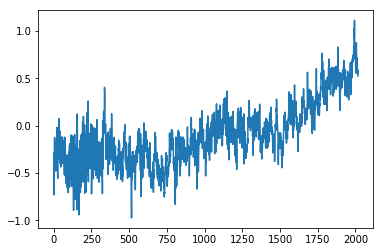

In [4]:
datos = loadtxt("clase2_imagenes_datos/HadCRUT.4.6.0.0.monthly_ns_avg_mod.txt")
plot(datos[:,2])

Hay una tendencia creciente, pero los datos todavía no están en el formato que necesitamos. Queremos eliminar las variaciones estacionales ya que los datos son mensuales. Así que queremos ver los promedios anuales, y necesitamos procesar los datos más.

In [5]:
# Seleccionamos los años únicos con la función "unique":
a = unique(datos[:,0])

In [6]:
promedio = []
for an in a:
    seleccion = (datos[:,0] == an)
    promedio.append( mean(datos[seleccion,2]) )
promedio = array(promedio)

Text(0, 0.5, 'Anomalía de temperatura')

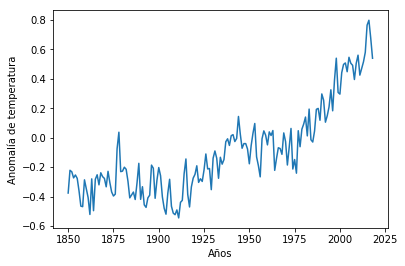

In [7]:
plot(a,promedio)
xlabel("Años")
ylabel("Anomalía de temperatura")

### 2. Aplicar análisis

Análisis de datos muchas veces significa un análisis *estadística*. Ejemplos simples son el valor promedio de un parámetro y algo que se llama la *desviación estandar* de un parámetro. 

Es muy importante tener conocimiento de la estadística para trabajar con datos! Hay un curso en el Semestre VI sobre la estadística. 

**La desviación estandar**: es una medición de cuánto varía una variable. Si vemos a una parte del gráfico de temperatura donde los valores son más o menos "estables", vemos que hay desviaciones pequeñas de los valores.

La desviación estandar es una cuantificación del tamaño de las desviaciones del valor promedio. 

La variación de un valor está asociada a la "distribución" del valor. Para muchas variables en la naturaleza la distribución es "gausiana" o "normal". Por ejemplo, la distribución de las alturas en una población de personas es típicamente una gausiana: 

![](clase2_imagenes_datos/gaussian.png)

Este gráfico dice que la mayoría de la población tiene una altura promedia (obviamente), y muy pocas personas son extremadamente alto o extremadamente corto. 

Este tipo de función también se llama una *función de densidad de probabilidad* (PDF, por sus siglas en inglés). Esta función da la probabilidad que una variable toma valores dentro de un cierto rango. La PDF gausiana tiene dos parámetros: el promedio de la distribución, y la *desviación estandar*. 

![](clase2_imagenes_datos/standard_deviation.png)

La desviación estandar determina el "ancho" de la distribución. Específicamente, incluye aproximadamente $68\%$ del área bajo la curva. Este significa que $68\%$ de los valores medidos deberían estar dentro de $1$ desviación estandar del valor promedio.

Para las temperaturas, en la época de temperaturas estables, podemos aproximar que las anomalías están distribuidas según la distribución gausiana.

Es un hecho matemático que la combinación de errores en mediciones, variabilidad natural, etc. tenderán a causar que las variables tengan una distribución gausiana.

Una desviación mayor que $1$ desviación estandar puede occurir en $32\%$ de los casos (para una distribución gausiana). Una anomalía mayor que $2$ desviaciones estandares puede occurrir en sólo $5\%$ de los casos. Algo mayor que $3$ desviaciones estandares tiene una probabilidad de solamente $0.4\%$.

#### Análisis estadística de las temperaturas

Calculamos el valor de la desviación estandar para la época $1961-1990$.

In [8]:
# Convertimos el arreglo de años de "float" a "int"
a = array(a,int)

In [9]:
# Creamos un arreglo para elegir solamente las anomalías anuales para el
# período 1961-1990
seleccion = ((a <= 1990) & (a >= 1961))

La función **std** de NumPy calcula la desviación estandar de un conjunto de datos.

In [10]:
std(promedio[seleccion])

0.13215956816792848

Entonces, una anomalía anual de valor absoluto mayor que $\sim 0.132$ sería una anomalía mayor que $1$ desviación estandar.

Ahora calculamos los valores absolutos de las anomalías a partir del año 2000.

In [11]:
seleccion = (a >= 2000)
abs(promedio[seleccion])/0.132

array([2.24179293, 3.34722222, 3.76893939, 3.84532828, 3.39393939,
       4.13699495, 3.83143939, 3.72474747, 2.99305556, 3.8270202 ,
       4.24558081, 3.21843434, 3.56691919, 3.90088384, 4.39457071,
       5.78977273, 6.04356061, 5.12815657, 4.08712121])

Las anomalías a partir del año 2000 son mayor que $2$ desviaciones estandares, y algunas son mayor que $5$!

Estas anomalías son tan improbable que no pueden ser variabilidad natural, aunque tenemos que tener en mente las suposiciones de nuestro análisis (por ejemplo, que el período $1961-1990$ es "estable").

### 3. Visualizar los resultados

Graficamos el valor absoluto de las anomalías a partir del año 1961, con una línea que indica $1$ desviación estandar del valor promedio de las anomalías en el período $1961-1990$.

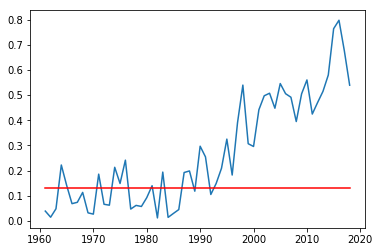

In [12]:
seleccion = (a >= 1961)
plot(a[seleccion],abs(promedio[seleccion]))
plot([1961,2018],[0.132,0.132],'r-')

Con este gráfico podemos ver muy claramente que las anomalías de temperatura en los últimos $20$ años son mucho mayor que $1$ desviación estandar.

La visualización del resultado es una parte muy importante del análisis de datos. Ayuda con la comunicación del resultado del análisis.

Así, otros investigadores pueden entender rápidamente nuestras conclusiones y sobre que base llegamos a ellas, para que puedan verificar nuestros resultados.

## Herramientas para análisis de datos

El trabajo de análisis de datos es lo que los astrónomos, los físicos experimentales, los meteorólogos, hacen *todo el tiempo*.

Hoy en día, tenemos muchas herramientas computacionales para este tipo de análisis.

En Python hay varios módulos útiles para análisis de datos:

* NumPy - Numerical Python (Python numérico)
* SciPy - Scientific Python (Python científico)
* matplotlib - Gráficos en Python
* pandas - Módulo para análisis de datos
* scikit-learn - Módulo para *machine learning* en Python
* Theano - Otro módulo que se usa en *machine learning*

#### SciPy

https://www.scipy.org/


![](clase2_imagenes_datos/scipy.png)

![](clase2_imagenes_datos/sympy_logo_small.png)

In [13]:
from sympy import *
init_printing()

x, y, z = symbols('x y z')

In [14]:
diff(cos(x),x)

In [15]:
expr = x/(1+x**2)
expr

In [16]:
integrate(expr,x)

In [17]:
init_printing(pretty_print=False)

![](clase2_imagenes_datos/pandas.png)

In [18]:
import pandas as pd

!head clase2_imagenes_datos/Shapley_galaxy.dat

In [19]:
datos = pd.read_csv("clase2_imagenes_datos/Shapley_galaxy.dat",delim_whitespace=True)
datos.head()

,R.A.,Dec.,Mag,V,SigV
0,193.02958,-32.84556,15.23,15056,81
1,193.04042,-28.54083,17.22,16995,32
2,193.04042,-28.22556,17.29,21211,81
3,193.05417,-28.33889,18.20,29812,37
4,193.05542,-29.84056,12.55,2930,38


In [20]:
datos.describe()

,R.A.,Dec.,Mag,V,SigV
count,4215.000000,4215.000000,4215.000000,4215.000000,4215.000000
mean,201.591313,-31.544202,15.132287,14789.242942,59.873547
std,5.424458,2.252409,4.830717,8043.123152,49.745016
min,193.029580,-37.648890,0.000000,-75.000000,0.000000
25%,196.853335,-32.887360,15.140000,10937.000000,33.000000
50%,201.966670,-31.477500,16.200000,14483.000000,51.000000
75%,204.833750,-29.848055,17.720000,16578.500000,78.000000
max,216.030000,-27.503330,22.330000,76746.000000,899.000000


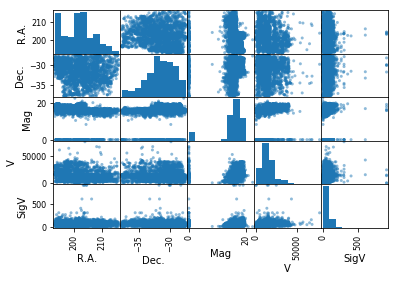

In [21]:
from pandas.plotting import scatter_matrix

plots = scatter_matrix(datos)

![](clase2_imagenes_datos/scikit_learn.png)

In [22]:
from sklearn import datasets, svm, metrics

digitos = datasets.load_digits()

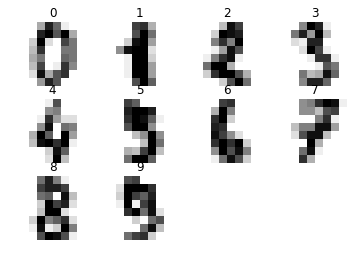

In [23]:
imagenes_y_etiquetas = list(zip(digitos.images, digitos.target))
for index, (image, label) in enumerate(imagenes_y_etiquetas[:10]):
    subplot(3, 4, index + 1)
    axis('off')
    imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    title('%i' % label)

In [24]:
n_muestras = len(digitos.images)
datos = digitos.images.reshape((n_muestras, -1))

In [25]:
# Usamos un algoritmo de machine learning que se llama 
# "support vector machine"
clasificador = svm.SVC(gamma=0.001)

In [26]:
# Usamos la mitad de los digitos para "entrenar" el algoritmo
clasificador.fit(datos[:n_muestras // 2], digitos.target[:n_muestras // 2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
# Predecimos los valores de la otra mitad de los digitos
esperado = digitos.target[n_muestras // 2:]
predicho = clasificador.predict(datos[n_muestras // 2:])

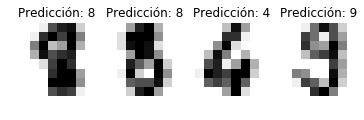

In [28]:
imagenes_y_predicciones = list(zip(digitos.images[n_muestras // 2:], predicho))
for index, (image, prediction) in enumerate(imagenes_y_predicciones[:4]):
    subplot(2, 4, index + 5)
    axis('off')
    imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    title('Predicción: %i' % prediction)

![](clase2_imagenes_datos/keras_tensorflow.jpeg)

Módulos para *machine learning*, diseñados para optimizar y evaluar expresiones matemáticas con arreglos. También aprovechan de los GPUs para acelerar el algoritmo.

![](clase2_imagenes_datos/pytorch.png)

Otro módulo, un poco más moderno que TensorFlow, para *machine learning* con redes neuronales artificiales.

## Datos masivos

Vimos antes que hoy en día tenemos muchos datos disponibles, pero demasiado para hacer un análisis "tradicional", como lo que hicimos arriba.

Necesitamos nuevas técnicas de extracción, almacenamiento y análisis de datos. El desarrollo y aplicación de estas técnicas es una ciencia nueva que se llama *ciencia de datos*.

### Bases de datos

Uno de los desafíos grandes en ciencia de datos es cómo almacenar y procesar los datos.

Un ejemplo es el nuevo telescopio el LSST.

![](clase2_imagenes_datos/lsst.jpg)

* $\sim 15$ TB de datos por noche.
* No es factible tener todos estos datos en formato *raw* en un servidor.
* Por ejemplo, si quiero usar solamente los datos de estrellas variables, quiero buscar y descargar solamente esos datos, y no todos.

Por lo tanto, es muy importante construir una *base de datos* que guarda los datos en una forma estructurada y accesible.

Hay equipos que trabajan en la colaboración del LSST que están diseñando esta base de datos, y la infraestructura necesaria para facilitarla (servidores, conexiones, etc.)

Hay otros ejemplos del uso de bases de datos:

* Simulaciones cosmológicas modernas generan muchos datos que necesitan organización.
* Experimentos en la física de partículas (por ejemplo, el LHC) también generan muchos datos.

Por lo tanto, para los científicos modernos es muy importante tener conocimiento del diseño y operación de las bases de datos.

### Los tipos de bases de datos

* Relacionales: los datos están organizados en tablas, que tiene relaciones entre ellas. Este tipo es el más común y tradicional.

![](clase2_imagenes_datos/relational_database_small.png)

* No-relacional: bases de datos distribuidas, almacen de documentos, bases de datos gráficas, pares de valores-claves

![](clase2_imagenes_datos/non_relational.jpg)

#### Bases de datos relacionales

Se puede "interactuar" con muchas bases de datos utilizando un lenguaje que se llama *SQL* (Structured Query Language). **No** es un lenguaje de programación, sino un lenguaje especializado para el uso de bases de datos.

* Los datos en una base de datos relacional están organizados en tablas (que a veces se llaman "relaciones") con columnas y filas.
* Las columnas corresponden a las atributas de los datos, mientra las filas son los registros.

Ejemplo: un catálogo de estrellas (filas), con coordenadas, tipo espectral, luminosidad, etc. (columnas):

Tabla: estrellas

![](clase2_imagenes_datos/catalogue.png)

El punto importante es que cada fila tiene un número de identificación, o una clave.

Entonces, quizás tenemos otra tabla sobre estrellas variables, con atributas (columnas) acerca de la variación en magnitud, tipo de estrella variable, etc. Cada estrella en esa tabla también tendrá un número de identificación:

Tabla: estrellas_variables

| ID  | Nombre      | Mag. max.  | Mag. min. | Tipo               |
|-----|-------------|------------|-----------|--------------------|
| 9   | Betelgeuse  |  0.0       |    1.3    | Supergigante rojo  |
| 60  | Algol       |  2.1       |    3.4    | Binaria eclipsante |
| 61  | Eta Carinae | -0.8       |    7.9    | Variable LBV       |

Así que podemos relacionar las dos tablas por coincidencia de los números de identificación.

En esta manera podemos combinar la información de muchas tablas para encontrar lo que necesitamos.

#### Acceso remoto

En el caso de los datos masivos del LSST, por ejemplo, las tablas que contienen la información de las observaciones van a estar en un servidor (o varios). Un astrónomo que quiere usar los datos puede enviar una solicitud al servidor (escrito en *SQL*) y el servidor combinará las tablas según lo que está pidiendo. Finalmente enviará la tabla resultante al usuario.

![](clase2_imagenes_datos/database_access.png)

#### SQL

Ahora veremos algunos ejemplos del uso de SQL para acceder información en una base de datos relacional. Primero, veremos algunos de los comandos básicos:

* SELECT (seleccionar): para elegir datos de una tabla
* WHERE (donde): para aplicar un filtro
* JOIN (unir): para combinar las filas de varias tablas

Hay distintos tipos de JOIN:

* INNER JOIN (unir internamente): solamente las filas que coinciden entre las tablas
* LEFT JOIN (unir a la izquierda): todas las filas de la tabla a la izquierda, y solamente las que coinciden en la tabla a la derecha
* RIGHT JOIN (unir a la derecha): opuesto de LEFT JOIN
* OUTER JOIN (unir externamente): usar todas las filas de las dos tablas si hay coincidencia

![](clase2_imagenes_datos/joins.png)

Un ejemplo con las tablas de estrellas:

```SELECT estrellas.nombre, estrellas.mass, estrellas_variables.tipo
FROM estrellas
INNER JOIN estrellas_variables ON estrellas.Rank=estrellas_variables.ID```

Estos comandos crearán otra tabla que contiene solamente los nombre, tipos y masas de las estrellas que coinciden en su valor de "rank" de la tabla *estrellas* y de su valor de "ID" de la tabla *estrellas_variables*:

| Nombre      | Mass             | Tipo               |
|-------------|------------------|--------------------|
| Betelgeuse  |  18              | Supergigante rojo  |
| Algol       |  3.2 (primaria)  | Binaria eclipsante |
| Eta Carinae |  100-200         | Variable LBV       |

Si la tabla arriba se llama *estrellas_var_masas*, podemos aplicar un filtro con WHERE:

```SELECT estrellas_var_masas.nombre, estrellas_var_masas.tipo
FROM estrellas_var_masas
WHERE estrellas_var_masas > 10```

Con este comando tenemos la siguiente tabla con sólo una fila:

| Nombre      | Tipo               |
|-------------|--------------------|
| Betelgeuse  | Supergigante rojo  |

#### Bases de datos no-relacionales

* Bases de datos sin mucha estructura
* No hay una forma "estandar" de estos tipos de bases de datos
* Para aplicaciones en el Internet, este tipo es más común ya que la información es muy dinámica, y cambia rápidamente
* También se usa este tipo si la información está distribuida en la red

#### Bases de datos en la astronomía

Se puede acceder a muchos bases de datos astronómicas directamente de Python por el uso del módulo **astroquery** que es parte de **astropy**, un módulo de funciones útiles para la astronomía.

![](clase2_imagenes_datos/astropy.png)

http://www.astropy.org/

https://astroquery.readthedocs.io/en/latest/

## Análisis de datos masivos

Obtener los datos es el primer paso. El segundo es hacer el análisis! Vimos el ejemplo antes de temperaturas promedias. Ahora veremos un ejemplo que muestra las dificultades en trabajar con datos **masivos**.

#### Ejemplo: datos (imágenes) de pulsares

![](clase2_imagenes_datos/neutron_star.jpg)

Un púlsar es una estrella de neutrones con una rotación muy rápida que emite en la longitud de onda de radio.

Suponemos que tenemos varias imagenes de pulsares.

* Podemos cargar la imágen a un arreglo, como vimos antes.
* Así que, tendremos los arreglos `imagen1`, `imagen2`, etc.

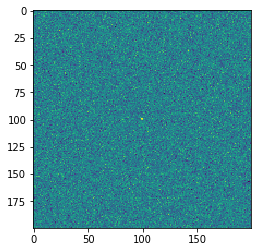

In [31]:
imagen1 = load("clase2_imagenes_datos/pulsars/image1.npy")
imagen6 = load("clase2_imagenes_datos/pulsars/image6.npy")

imshow(imagen1)

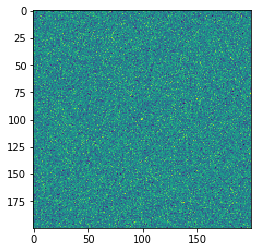

In [32]:
imshow(imagen6)

In [33]:
type(imagen1)

numpy.ndarray

Los datos de cada imágen están en arreglos de NumPy. Si las imágenes tienen una resolución de $200 \times 200$, vamos a tener arreglos de $200 \times 200 = 40000$ elementos.

In [34]:
imagen1.shape

(200, 200)

Tenemos $10$ imagenes, así que cargamos todas las imagenes en un arreglos de $3$ dimensiones: $200 \times 200 \times 10 = 400000$ elementos.

In [35]:
imagenes = zeros((200,200,10))
for i in range(1,10+1):
    imagenes[:,:,i-1] = load("clase2_imagenes_datos/pulsars/image"+str(i)+".npy")

In [36]:
imagenes.shape

(200, 200, 10)

#### Combinando las imagenes

<img style="float: right;" src="clase2_imagenes_datos/pulsar_image1.png">

No se va nada en las imagenes! Solo "ruido"! 

En cada pixel hay un "error" (ruido térmico en el detector, etc.). Hay un señal, pero está muy cerca a los valores de ruido en las imagenes, así que no vemos nada.

Suponemos que los errores tienen una distribución gausiana, que es muy probable.

De hecho, podemos investigar si es así o no. Usamos la función **histogram** para calcular la frecuencia de ocurrencia de valores:

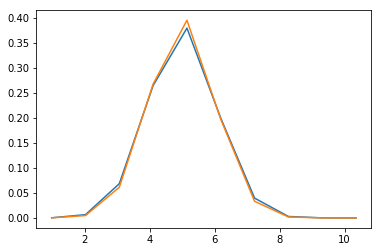

In [37]:
from scipy import stats
h, bins = histogram(imagenes.flatten(), density=True)
centros = 0.5*(bins[1:] + bins[:-1])

pdf = stats.norm.pdf(centros,loc=5.0)
plot(centros, h)
plot(centros, pdf)

Del gráfico anterior, parece que los valores en los pixeles de las imagenes están distribuidas según la distribución gausiana, con valor promedio de $5$. Este valor corresponde al valor de fondo del instrumento (lo que detecta el telescopio de un cielo oscuro).

¿Por qué es útil saber que los "errores" tienen una distribución gausiana? Porque ahora podemos sumar toda las imagenes, y los errores se van a *cancelar* (estadísticamente)! De hecho, calculamos el valor *promedio* de cada pixel.

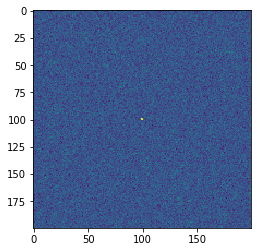

In [38]:
imagen_resultante = mean(imagenes,axis=2)

imshow(imagen_resultante)

Ahora podemos ver un puntito en el medio que es la detección (estadística) de un púlsar!

#### Otro análisis: usando el mediano

Esta operación de combinar imagenes es algo muy común en la astronomía. Se llama *stacking* (apilado).

Para calcular el valor promedio de los pixeles, no era necesario cargar *todas* las imagenes.

Otra manera de hacerlo es la siguiente:

In [39]:
imagen_resultante = zeros((200,200))
for i in range(1,10+1):
    imagen_resultante += load("clase2_imagenes_datos/pulsars/image"+str(i)+".npy")
imagen_resultante /= 10

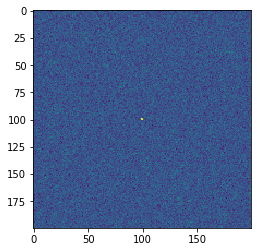

In [40]:
imshow(imagen_resultante)

Llegamos al mismo resultado, pero estamos guardando solamente $2$ arreglos en la memoría a la vez: el arreglo `imagen_resultante` y el arreglo del imágen actual en cada iteración del ciclo.

Un problema con el promedio de un conjunto de variables es que es muy sensible a valores extremos (los llamados *outliers*) que vimos antes.

Por lo tanto, muchas veces es mejor usar la *mediana*. La mediana es el valor que separa la distribución de valores en dos partes iguales.

![](clase2_imagenes_datos/mode_median.png)

In [41]:
mean(imagenes), median(imagenes)

(5.001326936528571, 5.00041743962621)

Por su definición, para calcular la mediana necesitamos tener *todos* los valores en la memoria a la vez, para organizar los datos en sus dos partes.

Este puede ser problemático si tenemos muchos datos.

In [42]:
type(imagenes), imagenes.dtype

(numpy.ndarray, dtype('float64'))

Todos los valores del arreglo de imagenes son *floats* de $64$ bits. Así que la memoria necesaria para cargar todos los datos es

$64 \times 400000 = 2.56 \times 10^7$ bits $\sim 3.2$ MB.

Pero si tenemos $1000$ imagenes, con resolución $1000 \times 1000$, ocupará

$64 \times 1000 \times 1000 \times 1000 \approx 8$ GB!

Es poco práctico cargar $8$ GB de datos en un computador para calcuar la mediana.

Una opción es usar un algorítmo que calcula una aproximación a la mediana que no necesita tener todos los arreglos en la memoria. Otra opción es... paralelizar el algorítmo!

Podríamos dividir las imágenes en sub-imágenes, calcular la mediana de cada sub-imágen, y determinar su promedio para la imágen total. Esta opción también es una aproximación al resultado.

* En el caso de analizar datos masivos, necesitamos nuevas formas de trabajar. El análisis "hecho a mano" que vimos al principio de la clase no sirve...

# Resumen

* Análisis de datos es algo que los científicos hacen todo el tiempo.
* Las herramientas computacionales que tenemos hoy en día ayudan muchisimo en ese área.
* El lenguaje **Python** tiene muchos módulos útiles para trabajar con datos.
* Otro lenguaje útil para análisis estadística es **R**.
* Con datos masivos, necesitamos una forma de organizarlos, por ejemplo con *bases de datos*.
* También hay que procesar (limpiar) los datos de problemas, errores, etc.
* En el análisis de datos masivos es necesario el uso de métodos nuevos (automáticos).
* En la mención hay $2$ cursos en el área de **ciencia de datos**. Las habilidades que uno aprende en este área sirven para muchos trabajos.